In [1]:
import pandas
from matplotlib import pyplot, font_manager, rc
from numpy import nan
import seaborn

In [2]:
font_path = 'malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

## 데이터 불러오고 컬럼명 변경하기

In [4]:
df = pandas.read_csv('auto-mpg.csv', header=None) 
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
              'model year', 'origin', 'name']

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## 무게에 따른 연비를 산점도로 나타내기

<AxesSubplot:xlabel='weight', ylabel='mpg'>

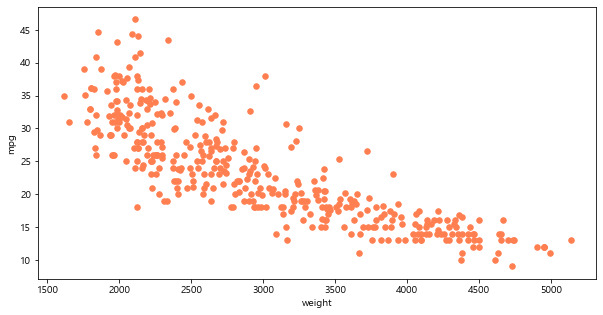

In [14]:
df.plot(kind='scatter',x='weight',y='mpg', color='coral',figsize=(10,5),s=30)

## 실린더의 크기를 점의 크기로 지정해 버블그래프로 나타내기
- 실린더가 클수록 버블의 모양이 커짐

<AxesSubplot:xlabel='weight', ylabel='mpg'>

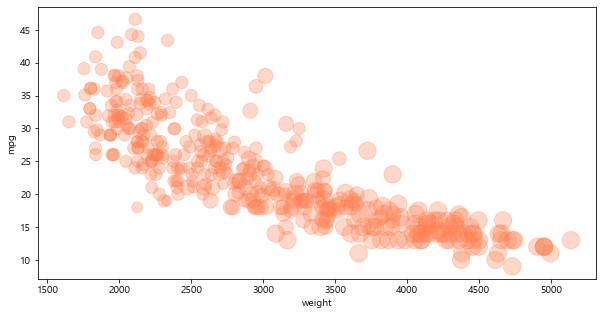

In [16]:
# 실린더 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

df.plot(kind='scatter',x='weight',y='mpg', color='coral',figsize=(10,5),
        s = cylinders_size, alpha = 0.3)

## 실린더의 크기를 색깔별로 표현하여 산점도 그리기
- 실린더가 클수록 노란색에 가까워짐

<AxesSubplot:xlabel='weight', ylabel='mpg'>

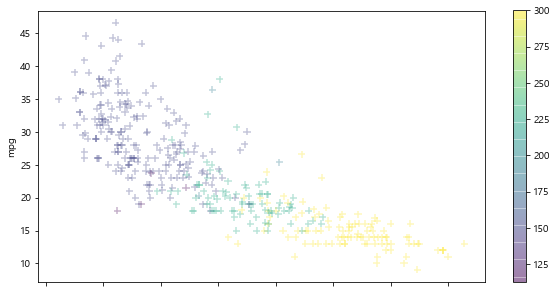

In [20]:
# 실린더 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

df.plot(kind='scatter',x='weight',y='mpg',marker='+',figsize=(10,5), cmap='viridis',
        c = cylinders_size, s = 50, alpha = 0.3) # 색상 컬러맵 : cmap='viridis'

## 국가별 점유율 파이차트로 나타내기
- groupby() 사용

<AxesSubplot:ylabel='count'>

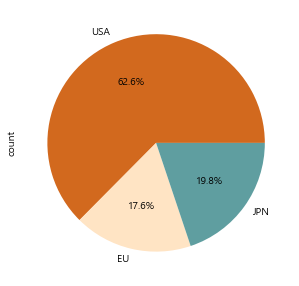

In [46]:
df = pandas.read_csv('auto-mpg.csv', header=None) 
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
              'model year', 'origin', 'name']

df['count'] = 1 # 국가별 점유 세주기 위해서
df_origin1 = df.groupby('origin').sum()
df_origin1.index = ['USA','EU','JPN']

# 파이 그래프 그리기
df_origin1['count'].plot(kind='pie',figsize=(7,5), autopct="%.1f%%", # 퍼센트 % 표시
                        colors=['chocolate','bisque','cadetblue'])

In [39]:
df_origin2 = df['origin'].value_counts() # 함수를 사용해 국가별 점유를 이렇게 세줄 수도 있음
df_origin2.index = ['USA','JPN','EU']
df_origin2

USA    249
JPN     79
EU      70
Name: origin, dtype: int64